<div class="alert alert-block alert-info">

This jupyter notebook shows an example of how to read in and use the data from simulations described in the paper https://arxiv.org/abs/1905.00910: <br>

**STROOPWAFEL: Simulating rare outcomes from astrophysical populations, with application to gravitational-wave sources**

by Floor S. Broekgaarden, Stephen Justham, Selma E. de Mink, Jonathan Gair, Ilya Mandel, Simon Stevenson, Jim W. Barrett, Alejandro Vigna-Gómez and Coenraad J. Neijssel  <br>
<br>

The data can be found on Zenodo <br>
This script is written for python 3, but should also work for python 2 by changing in the last function in the histogram function the 'density=True'  to 'normed=True'
___

Last updated September 2019 <br>
For any queries, email: <br>


__fsbroekgaarden@gmail.com__

__fbroekgaarden@g.harvard.edu__

## Obtain data

- Download the file **STROOPWAFEL_data_BroekgaardenEtAll.tar.gz** from Zenodo and uncompress the data using: <br>
```
     tar xvzf STROOPWAFEL_data_BroekgaardenEtAll.tar.gz
```


The tar file contains the following 7 directories with data (DCO = Double Compact Object) :  <br>


**Traditional**        # data of the simulations run with sampling from the birth distributions (traditional sampling) at Z = 0.001 metallicity <br>
**ALL**      	       # data of ALL DCOs (simulation 1) at Z = 0.001 metallicity with STROOPWAFEL sampling<br>
**BHBH**     	       # data of BH-BH DCOs (simulation 2) at Z = 0.001 metallicity with STROOPWAFEL sampling<br>
**BHNS**     	       # data of BH-NS DCOs (simulation 3) at Z = 0.001 metallicity with STROOPWAFEL sampling<br>
**NSNS**     	       # data of NS-NS DCOs (simulation 4) at Z = 0.001 metallicity with STROOPWAFEL sampling<br>
**BHBH_50Msun**     	       # data of BH-BH DCOs that have total mass <= 50 Msun (simulation 5) at Z = 0.001 metallicity with STROOPWAFEL sampling<br>
**NSNS_50Myr**     # data of NS-NS DCOs that merge within <= 50 Myrs (simulation 6) at Z = 0.001 metallicity with STROOPWAFEL sampling<br>

which correspond with the 6 STROOPWAFEL sampled simulations + the reference "birth distribution Monte Carlo" sampled simulation ("Traditional"). These simulations are summarized in Table 2 of https://arxiv.org/pdf/1905.00910.pdf <br>

# Analyze STROOPWAFEL data

Using the functions **obtaindataSTROOPWAFEL** and **maskTargetDCOsSTROOPWAFEL** which are defined below we can obtain the needed parameters from the data and, for example, calculate the merger rate of all DCOs for both the traditional and STROOPWAFEL sampled simulations. 

- the function **obtaindataSTROOPWAFEL** obtains the wanted parameter that are described in README_DCOs.txt and README_systems.txt, such as the DCO masses or separation. 
- the function **maskTargetDCOsSTROOPWAFEL** returns a mask that can filter the wanted DCOtype. An example is BH-BH binaries that merge in a Hubble time. 


In the remaining notebook we will provide examples. For these examples we use the simulations from Traditional sampling (simulation 0) and ALL DCOs (simulation 1). But these can easily be changed to any of 'Traditional', 'ALL', 'BHNS', 'BBH', 'NSNS', 'NSNS_50Myr' or 'BHBH_50Msun'  corresponding with the 6 simulations performed in our study. To do this, change the parameter ```simulation``` to the wanted simulation from the list 'Traditional', 'ALL', 'BHNS', 'BBH', 'NSNS', 'NSNS_50Myr' or 'BHBH_50Msun' and changing, if needed, ```DCOtype``` to the corresponding target binary type from the list ['ALL', 'BHNS', 'BBH', 'NSNS' or 'NSNS_50Myr'] <br>



#### import libraries and add path to data. 

In [1]:
import pandas as pd # can be downloaded here: https://pandas.pydata.org/
import numpy as np # can be installed through https://docs.scipy.org/doc/numpy/user/install.html

# path to directory with Traditional and STROOPWAFEL directories 'ALL', 'BHBH' etc.. 
pathData = '/Users/floorbroekgaarden/Programs/COMPAS/popsynth/Papers/BroekgaardenEtAl/STROOPWAFELmethod/PublicDATA/STROOPWAFEL_data_BroekgaardenEtAll'



In [2]:
def obtaindataSTROOPWAFEL(simulation='ALL', datafile='allDoubleCompactObjects.dat', path=pathData, paramHeader='separationInitial'):
    '''
    returns the wanted parameter and corresponding weights for a given simulation. In case of the STROOPWAFEL simulation
    the function combines the data from the exploration and refinement phase
    //
    parameters:
    simulation # simulation name. options are 'Traditional', 'ALL', 'BHNS', 'BHBH', 'NSNS', 'NSNS_50Myr' and 'BHBH_50Msun'
    datafile # datafile that contains wanted parameter; either 'allDoubleCompactObjects.dat' or 'allSystems.dat'
    path # path to the directory with all the data
    paramHeader # header name of the wanted parameter in the allSystems.dat or allDoubleCompactObjects.dat files
    '''
    
    # read in datafiles. 
    # stroopwafel sampling has 2 directores: exploration and refinement phase
    if (simulation=='Traditional') :
        data = pd.read_csv(path + '/' + simulation + '/' + datafile, sep='\t', header=2)
        weights = np.ones(len(data['ID'])) # all traditional weights are 1

    else: # Stroopwafel sampling
        path_expl = path + '/' + simulation + '/exploration/'
        path_ref  = path + '/' + simulation + '/refinement/'

        # Set name of weights textfile
        if datafile=='allDoubleCompactObjects.dat':
            weightsfilename = 'allDoubleCompactObjectsWeights.txt'
        elif datafile=='allSystems.dat':
            weightsfilename = 'allSystemsWeights.txt'
        else:
            print('error: name of datafile not correct in obtaindataSTROOPWAFEL()')        
        
        # read in datafiles
        data_expl = pd.read_csv(path_expl  + datafile, sep='\t', header=2)
        data_weights_expl = pd.read_csv(path_expl  + weightsfilename, sep='\t', header=2)

        data_ref = pd.read_csv(path_ref  + datafile, sep='\t', header=2)
        data_weights_ref = pd.read_csv(path_ref + weightsfilename, sep='\t', header=2)

        # combine data and weights from exploration and refinement                     
        data = pd.concat([data_expl, data_ref])
        weights = pd.concat([data_weights_expl['weight'], data_weights_ref['weight']])
    
    param = data[paramHeader]
    
    return np.asarray(param), np.asarray(weights)


def maskTargetDCOsSTROOPWAFEL(DCOtype='ALL', simulation='ALL', boolDCOmask=[1,1,0], path=pathData):
    """
    returns mask of DCOs of interest
    //
    parameters:
    DCOtype # describes target binary. Options are: 'ALL', 'BHNS', 'BBH', 'NSNS', 'NSNS_50Myr' and 'BHBH_50Msun
    simulation # name of simulation. Options are: Traditional, 'ALL', 'BHNS', 'BBH', 'NSNS', 'NSNS_50Myr' and 'BHBH_50Msun'
    boolDCOmask = [Hubble, RLOF, Pessimistic] # boolean values whether to mask mergers in a HUbble time, 
    binaries that have RLOFSecondaryAfterCEE = True, and Pessimistic binaries (i.e. optimisticCEFlag == 0)
    path # pathname to Directory where _exploratory & _refinement directories are
    """
    
    Hubble, RLOF, Pessimistic = boolDCOmask
    
    # all needed parameters are in the DCO file
    datafile = 'allDoubleCompactObjects.dat'
 
    # data for DCO type mask
    stellarType1, _ =  obtaindataSTROOPWAFEL(simulation, datafile, path, paramHeader='stellarType1')  
    stellarType2, _ = obtaindataSTROOPWAFEL(simulation, datafile, path, paramHeader='stellarType2') 
    # data for boolDCOmask: 
    mergesInHubbleTimeFlag, _ = obtaindataSTROOPWAFEL(simulation, datafile, path, paramHeader='mergesInHubbleTimeFlag')  
    RLOFSecondaryAfterCEE, _ = obtaindataSTROOPWAFEL(simulation, datafile, path, paramHeader='RLOFSecondaryAfterCEE') 
    optimisticCEFlag, _ = obtaindataSTROOPWAFEL(simulation, datafile, path, paramHeader='optimisticCEFlag') 
    
    if (DCOtype == 'NSNS_50Myr') : # obtain merger time
        tc, _ = obtaindataSTROOPWAFEL(simulation, datafile, path, paramHeader='tc')   
    if (DCOtype == 'BHBH_50Msun') : # obtain BH masses 
        M1, _ = obtaindataSTROOPWAFEL(simulation, datafile, path, paramHeader='M1')         
        M2, _ = obtaindataSTROOPWAFEL(simulation, datafile, path, paramHeader='M2')             
        Mtot = M1 + M2 
        
    # mask binaries of given simulation (i.e. DCO type)
    if (DCOtype == 'all') | (DCOtype == 'ALL') :
        mask0 = ((stellarType1== 14) | (stellarType1== 13))
    elif (DCOtype == 'BBH') | (DCOtype == 'BHBH')  :
        mask0 = ((stellarType1== 14) & (stellarType2== 14))
    elif (DCOtype == 'BNS') | (DCOtype == 'NSNS')  :
        mask0 = ((stellarType1 == 13) & (stellarType2 == 13))
    elif (DCOtype == 'BHNS') | (DCOtype == 'NSBH'):
        mask0 = ((stellarType1== 13) & (stellarType2== 14)) | \
            ((stellarType1== 14) & (stellarType2== 13) )           
    elif (DCOtype == 'NSNS_50Myr') :
        mask0 = ((stellarType1 == 13) & (stellarType2 == 13) & (tc <= 50)  )
    elif (DCOtype == 'BHBH_50Msun'):
        mask0 = ((stellarType1== 14) & (stellarType2== 14) & (Mtot >= 50))     
    else:
        print('error: DCO type not known')
    
    # boolDCOmasks:
    # Hubble mask
    if Hubble:
        mask1 = (mergesInHubbleTimeFlag==True) 
    elif not Hubble:
        mask1 = (mergesInHubbleTimeFlag==True) |  (mergesInHubbleTimeFlag==False) 
    # RLOF mask
    if RLOF:
        mask2 = (RLOFSecondaryAfterCEE==False)
    elif not RLOF:
        mask2 = (RLOFSecondaryAfterCEE==False) | (RLOFSecondaryAfterCEE==True)
    # Pessimistic mask :  if True mask systems that have optimistic CE flag ==1
    if Pessimistic:
        mask3 = np.logical_not(optimisticCEFlag==1)
    elif not Pessimistic:
        mask3 = np.logical_not(optimisticCEFlag==1) + \
        np.logical_not(optimisticCEFlag==0)   
    
    # combine the different masks 
    combinedmask = mask0 * mask1 * mask2 * mask3

    return combinedmask



## 5. Plot final masses Double Compact Object systems (Fig.7)

The functions below create figure 6 of FSB+2019. <br>
This is done by first calculating the density of samples (i.e. target binaries) for the parameter space using a 2D-histogram, after which contours with a certain sampling density are drawn. For 2D-histogram bins with a sampling density below the lowest contour level, we draw the individual samples. 

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid.anchored_artists import AnchoredAuxTransformBox

# from matplotlib.offsetbox import AnchoredText
# from matplotlib import rc                                                                                                                                                                                                                    
# from matplotlib import rcParams

# below is just for the text
rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  import sys


In [4]:
# array with gravitational wave estimates from LIGO-Virgo public data
#name m1 m1_plus m1_minus m2 m2_plus m2_minus spin spin_plus spin_minus
gw150914 = [35.6, 4.8, 3, 30.6, 3, 4.4, -0.01, 0.12, 0.13]                     
gw151012 = [23.3, 14, 5.5, 13.6, 4.1, 4.8, 0.04, 0.28, 0.19]                     
gw151226 = [13.7, 8.8, 3.2, 7.7, 2.2, 2.6, 0.18, 0.2, 0.12]           
gw170104 = [31, 7.2, 5.6, 20.1, 4.9, 4.5, -0.04, 0.17, 0.2]       
gw170608 = [10.9 ,5.3 ,1.7, 7.6, 1.3, 2.1, 0.03, 0.19, 0.07]       
gw170729 = [50.6, 16.6, 10.2, 34.3, 9.1, 10.1 ,0.36, 0.2, 0]       
gw170809 = [35.2 ,8.3, 6 ,23.8 ,5.2, 5.1, 0.07 ,0.16 ,0.16]    
gw170814 = [30.7 ,5.7, 3, 25.3, 2.9, 4.1, 0.07, 0.12, 0.11]   
gw170817 = [1.46 ,0.12 ,0.1 ,1.27 ,0.09 ,0.09, 0 ,0.02 ,0.01]    
gw170818 = [35.5 ,7.5 ,4.7, 26.8, 4.3 ,5.2, -0.09, 0.18, 0]   
gw170823 = [39.6 ,10 ,6.6 ,29.4, 6.3, 7.1 ,0.08, 0.2, 0.22]

GWdata = [gw150914, gw151012, gw151226, gw170104,gw170608,gw170729 , gw170809, gw170814, gw170817, gw170818, gw170823]

In [5]:
def symmetrizedMasses(m1=20, m2=10):
    """returns back symmetrized masses: 
    where m1 is always the most massive of the binary"""
    
    maskM1BH = (m1 >=m2)
    m1moremass, m2leastmass = np.zeros_like(m1), np.zeros_like(m1)
    m1moremass[maskM1BH], m1moremass[~maskM1BH] = m1[maskM1BH], m2[~maskM1BH]

    m2leastmass[maskM1BH],m2leastmass[~maskM1BH] = m2[maskM1BH], m1[~maskM1BH]
    
    return m1moremass, m2leastmass



In [6]:
def plotScatterFig7(xvalues, yvalues, DCOtype, path, f, ax, labelmethod, label, i):
    """ plots countour levels and points outside range for given data, cf. Fig 6 of FSB+2019
    ./ input:
    xvalues, yvalues = x- and y-values that are plotted
    DCOtype = target binary of interest, examples are BHBH, BHNS, NSNS, ALL
    path = path to datafiles
    f, ax, plot = properties
    labelmethod, label = labels of the sampling method, and of the DCO type
    i = ind of simulation [0,1,2,3,...]
    ./
    """


    fs=40  # fontsize used in plots
    
    # make up axes & axes ranges 
    colorslist =  ['#189ef8' , '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00'] #'#377eb8'
    colorSingle = colorslist[i]
    
    xlabel =  r'$ \mathrm{m}_{\rm{1,f}} \, [M_{\odot}]$'
    ylabel = r' $  \rm{m}_{\rm{2,f}} \, [M_{\odot}]$'
    

    ax.tick_params(labelsize=fs, pad = 10)
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.75)
    
    

    # draw scatter points
    ax.scatter(xvalues, yvalues, color = colorSingle, s = 24, marker = '.')
    

     
    ax.set_xlabel(xlabel, fontsize = fs+5)
    ax.set_ylabel(ylabel, fontsize = fs+5, labelpad=-10)
    
    
    # Labels and text 
    ax.annotate(labelmethod, xy=(0.05, 0.95), xycoords='axes fraction', fontsize = fs, weight = 'bold', va="top",bbox=bbox_props)
    ax.annotate(label, xy=(0.54, 0.95), xycoords='axes fraction', fontsize = fs-5, weight = 'bold', color = colorSingle, bbox=bbox_props, va="top")

  
    # plot the final mass estimates for the O1 + O2 gravitational wave observations
    if (i ==0) | (i==1):
        for gw in GWdata:
            ax.errorbar(x = gw[0], y =gw[3], yerr = [[gw[5]],[gw[4]]], xerr = [[gw[2]], [gw[1]]] , c='k', elinewidth = 2,  capthick=2, zorder = 20, capsize = 8, fmt = 'D', markersize='8') 

    elif i==3:
        for gw in [GWdata[8]]:
            ax.errorbar(x = gw[0], y =gw[3], yerr = [[gw[5]],[gw[4]]], xerr =  [[gw[2]],[gw[1]]] , c='k', elinewidth = 2,  capthick=2, zorder = 20, capsize = 8, fmt = 'D', markersize='8')       


    return ax




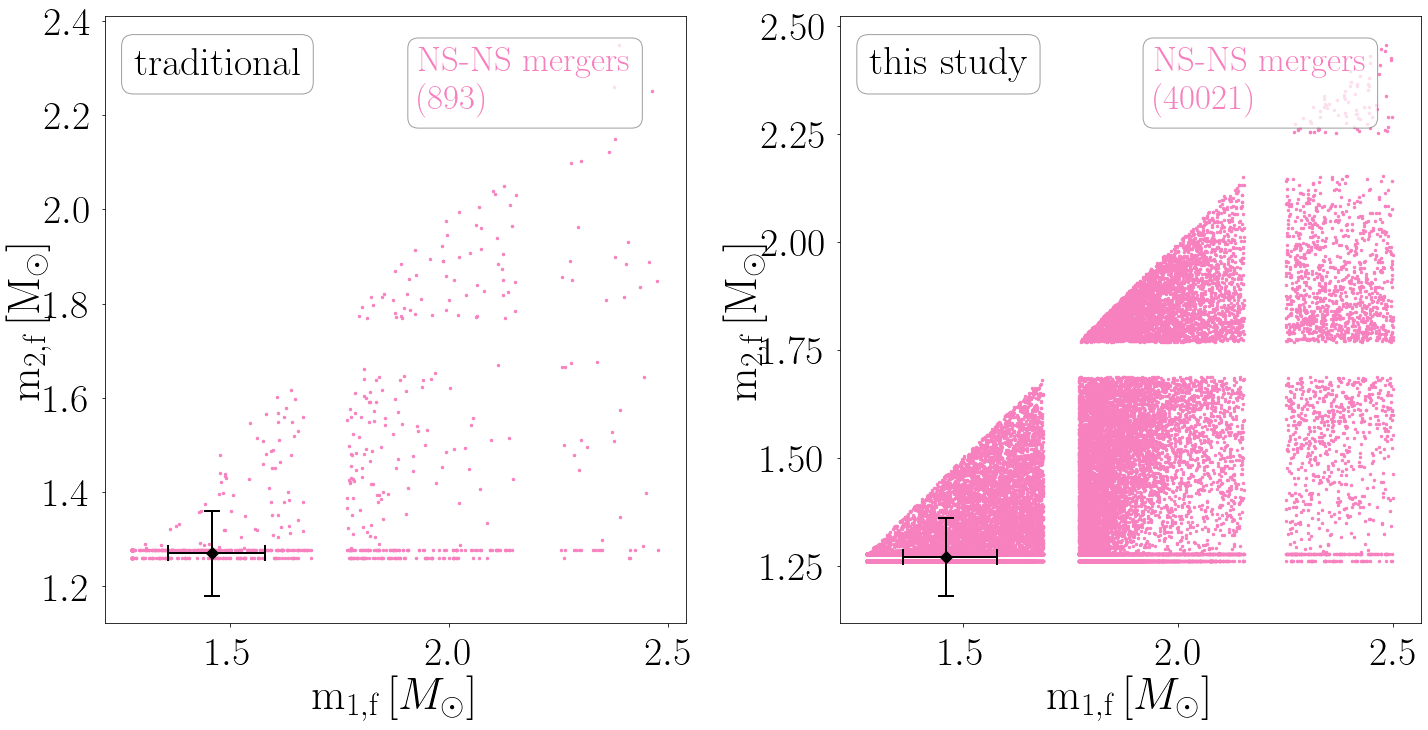

In [7]:


f, axarr= plt.subplots(1, 2,  figsize=(20,10))      




    
    
########################################################
#########################  NS-NS ################## 

DCOtype='NSNS'
simulation='NSNS'

# obtain Traditional data
M1_final_0, _ = obtaindataSTROOPWAFEL(paramHeader='M1', simulation='Traditional',\
                      datafile='allDoubleCompactObjects.dat', path=pathData)
M2_final_0, weights_0 = obtaindataSTROOPWAFEL(paramHeader='M2', simulation='Traditional',\
                      datafile='allDoubleCompactObjects.dat', path=pathData) 
DCOmask_0 = maskTargetDCOsSTROOPWAFEL(DCOtype=DCOtype, simulation='Traditional', boolDCOmask=[1,1,0], path=pathData) 
# mask the DCO of interest
M1_final_0, M2_final_0, weights_0 = M1_final_0[DCOmask_0], M2_final_0[DCOmask_0], weights_0[DCOmask_0]
#symmetrize masses 
M1_final_0, M2_final_0 = symmetrizedMasses(M1_final_0, M2_final_0)



# obtain STROOPWAFEL data
M1_final_1, _ = obtaindataSTROOPWAFEL(paramHeader='M1', simulation=simulation,\
                      datafile='allDoubleCompactObjects.dat', path=pathData)
M2_final_1, weights_1 = obtaindataSTROOPWAFEL(paramHeader='M2', simulation=DCOtype,\
                      datafile='allDoubleCompactObjects.dat', path=pathData) 
DCOmask_1 = maskTargetDCOsSTROOPWAFEL(DCOtype=DCOtype, simulation=simulation, boolDCOmask=[1,1,0], path=pathData) 
# mask the DCO of interest
M1_final_1, M2_final_1, weights_1 = M1_final_1[DCOmask_1], M2_final_1[DCOmask_1], weights_1[DCOmask_1]
# symmetrize masses:
M1_final_1, M2_final_1 = symmetrizedMasses(M1_final_1, M2_final_1)


# PLOT ALL Traditional
axarr[0] = plotScatterFig7(M1_final_0, M2_final_0, DCOtype=DCOtype, path=pathData,f=f, ax=axarr[0], labelmethod='traditional', \
                                   label='NS-NS mergers \n (%s) '%len(M1_final_0), i=3)
    
# PLOT ALL STROOPWAFEL
axarr[1] = plotScatterFig7(M1_final_1, M2_final_1, DCOtype=DCOtype, path=pathData,f=f, ax=axarr[1], labelmethod='this study', \
                                   label='NS-NS mergers \n (%s) '%len(M1_final_1), i=3)    
    



    
plt.tight_layout(pad=0.4, w_pad=3, h_pad=3.0)
plt.show() 


